# Universidad Nacional de San Antonio Abad del Cusco

*   Curso : Mineria de datos
*   Estudiante : Jhon Edwin Tacusi Larota
*   Tarea: 5 ejercicios en pyspark



In [3]:
!pip install pyspark


  Using cached pyspark-3.2.0.tar.gz (281.3 MB)
  Using cached py4j-0.10.9.2-py2.py3-none-any.whl (198 kB)
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=5eca1c8d32744072df0bfcf50edd3a4096bac5433ed9a08f02e57cfba5a93115
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [7]:

import math
from pyspark.sql.functions import *
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf
sc =SparkContext.getOrCreate()


# 1 Estandarizacion


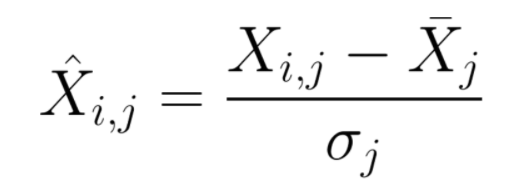

In [5]:
# modulo para la estandarizacion de datos  ne pyspark
def ESTANDARIZACION(data):
    desviacion_estandar = data.stdev()# Hallamos la desviacion
    media = data.mean()
    estandarizado = data.map(lambda x: (x-media)/(desviacion_estandar))     # Realizamos la estandarizacion de cada elemento
    return estandarizado    # Retornamos el resultados

In [53]:

data = [2,4,8,16,32,64,128,256,512,1024,2048] # ngresamos nuestros datos 
dataRDD = sc.parallelize(data,4)
estandarizacion = ESTANDARIZACION(dataRDD)
print(estandarizacion.collect())# imprimimos resultado de la Estandarizacion de nuestros datos

[-0.6086730017577477, -0.6053844933985458, -0.5988074766801418, -0.5856534432433339, -0.5593453763697182, -0.5067292426224864, -0.4014969751280232, -0.19103244013909668, 0.2298966298387564, 1.0717547697944625, 2.7554710497058745]


#2 Nomrlaizacion

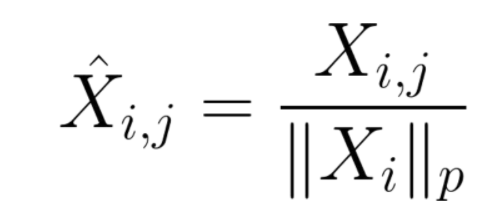

In [19]:
# modulo para la normalizacion
def normalizacion(x):
    listaCuadrada=x.map(lambda xi:xi*xi)
    total=listaCuadrada.sum()
    val=math.sqrt(total)
    lista= x.map(lambda xi :(xi/val))#escalonamos cada elemento com map
    return lista #retornamos el RDD escalonado

In [54]:
Vec = sc.parallelize(range(30,40),4) # generamos datos entre 30 y 40
NORMALIZACION=normalizacion(Vec)# aplicamos el modulo de normalizacion
print(NORMALIZACION.collect())# imprimimos el resultado de la normalizacion de nuestros datos

[0.2740326026847311, 0.2831670227742222, 0.2923014428637132, 0.30143586295320424, 0.31057028304269524, 0.3197047031321863, 0.32883912322167735, 0.33797354331116836, 0.3471079634006594, 0.35624238349015047]


# 3 SIMILITUD E COSSENOS


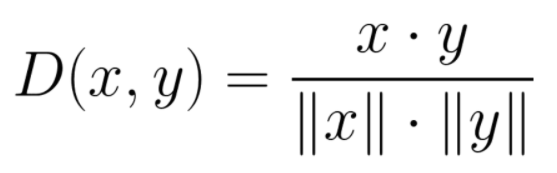

In [56]:
# modulo para el uso de similitud de cosenos
def SimilitudCosenos(x,y): 
    def punto(x,y):
        return x.zip(y).map(lambda x: x[0]*x[1]).reduce(lambda x , y :x+y) #reducimos sumando los productos 
    num=punto(x,y)#numerador producto punto de x e y
    den=punto(x,x)*punto(y,y)#denominador producto de los vectores normales de x e y
    return num/den

In [58]:
x = sc.parallelize(range(0,50),4) # obtenemos el valor de x en un rango de 0 a 50
y = sc.parallelize(range(50, 100),4) # obtenemos el valor de y en un rango de 50 a 100
print(SimilitudCosenos(x,y)) # imprimimos el resultado de similitud de cosenos

8.735439837289278e-06


# 4  Escalonamiento


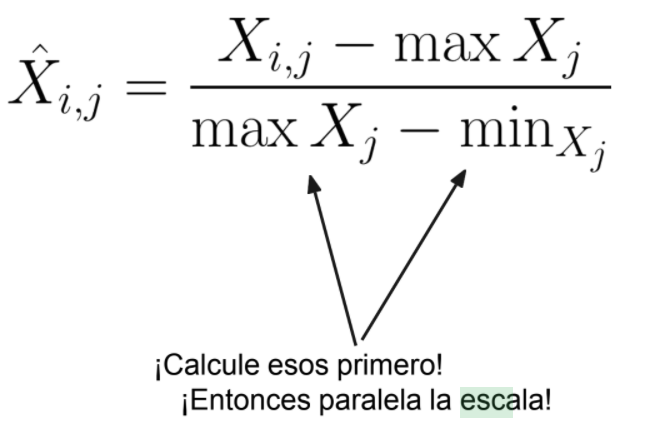

In [60]:
# modulo de escalonamiento
def ESCALONAMIENTO(data):
    maxval = data.max()# Hallamos el valor maximo
    minval = data.min()# Hallamos el valor minimo 
    escalonado = data.map(lambda x: (x-minval)/(maxval-minval))# Realizamos el escalonamiento 
    return escalonado # resultado del dato escalonado

In [61]:

data = [2,4,8,16,32,64,128,256,512,1024,2048] # ngresamos nuestros datos 
dataRDD = sc.parallelize(data,3)
escalonamiento = ESCALONAMIENTO(dataRDD)# uso del modulo de escalonamiento para nuetsro datos
print(escalonamiento.collect()) # imprimimos los datos de escalamiento de nuestros datos

[0.0, 0.0009775171065493646, 0.002932551319648094, 0.006842619745845552, 0.01466275659824047, 0.030303030303030304, 0.06158357771260997, 0.1241446725317693, 0.24926686217008798, 0.4995112414467253, 1.0]


# 5 TF

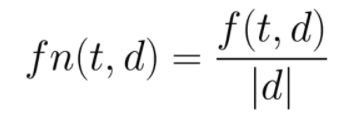

In [42]:
# modulo TF 
def TF(oraciones):
    mapeo = oraciones.flatMap(lambda x: [((x[0],i),1) for i in x[1].split()])# mapeamos cada oracion
    reducir = mapeo.reduceByKey(lambda x,y:x+y)
    tf = reducir.map(lambda x: (x[0][1], (x[0][0],(1 + math.log10(x[1]/(len(data[x[0][0]-1][1].split(" "))))))))     # APlicaremos la formula de TF
    reducir2 = reducir.map(lambda x: ((x[0][0],x[0][1]), (1 + math.log10(x[1]/(len(data[x[0][0]][1].split(" "))))) ))   
    muestra = reducir.map(lambda x: (x[0][1], "doc-"+str(x[0][0]),(1 + math.log10(x[1]/(len(data[x[0][0]][1].split(" "))))))) # Visualizacion de los tokens con sus valores TF
    return tf, reducir2, muestra # retorna el TF y la muestra

In [64]:

data=[(0,'la escuela de informatica'),(1,"la mejor facultad de la universidad")] # Creamos nuestra data de dos oraciones
oraciones=sc.parallelize(data,2)# Volvemos este arreglo  2 particiones
oraciones.collect()
tf = TF(oraciones) # Aplicamos el modulo tf
tf[2].collect() # imprimimos los resultados del tf de nuestros datos

[('la', 'doc-1', 0.5228787452803375),
 ('facultad', 'doc-1', 0.22184874961635637),
 ('de', 'doc-1', 0.22184874961635637),
 ('la', 'doc-0', 0.3979400086720376),
 ('escuela', 'doc-0', 0.3979400086720376),
 ('de', 'doc-0', 0.3979400086720376),
 ('informatica', 'doc-0', 0.3979400086720376),
 ('mejor', 'doc-1', 0.22184874961635637),
 ('universidad', 'doc-1', 0.22184874961635637)]